In [1]:
peakPupil = read.csv(file="/Users/Michael/Documents/CMU/Research/ASD/nback/tidyData_v2.csv")
peakPupil$subjectNumber = factor(peakPupil$subjectNumber)
peakPupil$diagnosis = factor(peakPupil$diagnosis)
peakPupil$female = factor(peakPupil$female)
peakPupil$caffeine = factor(peakPupil$caffeine)
peakPupil$meds = factor(peakPupil$meds)
peakPupil$glasses = factor(peakPupil$glasses)
peakPupil$hit = factor(peakPupil$hit)
peakPupil$FA = factor(peakPupil$FA)
peakPupil$miss = factor(peakPupil$miss)
peakPupil$aud = factor(peakPupil$aud)
peakPupil$distractors = factor(peakPupil$distractors)

In [2]:
library(dplyr)
dataMeth = peakPupil %>%
subset(hit == 1 & FA == 0 & miss == 0 & aud == 0 & distractors == 0)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
library(psych)
describeBy(dataMeth, group = dataMeth$diagnosis)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”Warning message in FUN(newX[


 Descriptive statistics by group 
group: 0
               vars  n   mean    sd median trimmed   mad    min    max  range
subjectNumber*    1 24  25.62 13.72  24.50   25.40 17.05   6.00  47.00  41.00
diagnosis*        2 24   1.00  0.00   1.00    1.00  0.00   1.00   1.00   0.00
age               3 24  28.38  6.74  25.50   27.45  5.19  21.00  47.00  26.00
female*           4 24   1.08  0.28   1.00    1.00  0.00   1.00   2.00   1.00
handedness        5 24  59.16 45.41  70.00   66.78 36.19 -85.71 100.00 185.71
caffeine*         6 24   1.54  0.51   2.00    1.55  0.00   1.00   2.00   1.00
meds*             7 24   1.04  0.20   1.00    1.00  0.00   1.00   2.00   1.00
glasses*          8 24   1.42  0.50   1.00    1.40  0.00   1.00   2.00   1.00
pupilContrast     9 24  77.29  9.09  80.00   77.25  7.41  55.00 100.00  45.00
corneaContrast   10 24 250.00  0.00 250.00  250.00  0.00 250.00 250.00   0.00
ADOSComm         11  0    NaN    NA     NA     NaN    NA    Inf   -Inf   -Inf
ADOSSoc          12 

In [4]:
glm.fit = glm(diagnosis ~ age + female + handedness, data = dataMeth, family = binomial)
summary(glm.fit)


Call:
glm(formula = diagnosis ~ age + female + handedness, family = binomial, 
    data = dataMeth)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6696  -1.0442  -0.9054   1.2098   1.4855  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -2.172206   1.365181  -1.591    0.112
age          0.068647   0.042135   1.629    0.103
female1      0.051023   1.066384   0.048    0.962
handedness   0.001010   0.006483   0.156    0.876

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 62.236  on 43  degrees of freedom
AIC: 70.236

Number of Fisher Scoring iterations: 4


In [5]:
glm.fit = glm(diagnosis ~ caffeine + glasses + meds, data = dataMeth, family = binomial)
summary(glm.fit)


Call:
glm(formula = diagnosis ~ caffeine + glasses + meds, family = binomial, 
    data = dataMeth)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1294  -0.8264  -0.6275   0.4677   1.8558  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -0.4548     0.5794  -0.785  0.43246   
caffeine1    -1.0703     0.7801  -1.372  0.17007   
glasses1      0.1168     0.7357   0.159  0.87392   
meds1         3.6828     1.1675   3.155  0.00161 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 45.600  on 43  degrees of freedom
AIC: 53.6

Number of Fisher Scoring iterations: 5


In [6]:
glm.fit = glm(diagnosis ~ pupilContrast + corneaContrast, data = dataMeth, family = binomial)
summary(glm.fit)


Call:
glm(formula = diagnosis ~ pupilContrast + corneaContrast, family = binomial, 
    data = dataMeth)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6424  -1.1389  -0.6301   1.2164   1.4679  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)
(Intercept)    -8.375e+02  8.484e+04  -0.010    0.992
pupilContrast   5.698e-02  3.868e-02   1.473    0.141
corneaContrast  3.331e+00  3.393e+02   0.010    0.992

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 59.673  on 44  degrees of freedom
AIC: 65.673

Number of Fisher Scoring iterations: 15


In [7]:
dataBeh = peakPupil %>%
subset(hit == 1 & FA == 0 & miss == 0 & aud == 0)

In [8]:
library(lme4)
library(lmerTest)
nocon.fit = lmer(dprime ~ diagnosis*distractors + (1 | subjectNumber), data = dataBeh)
summary(nocon.fit)
con.fit = lmer(dprime ~ diagnosis*distractors*meds + (1 | subjectNumber), data = dataBeh)
summary(con.fit)
BIC(nocon.fit)
BIC(con.fit)

Loading required package: Matrix

Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: dprime ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataBeh

REML criterion at convergence: 194.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.18957 -0.36942  0.00733  0.42376  2.29364 

Random effects:
 Groups        Name        Variance Std.Dev.
 subjectNumber (Intercept) 0.5378   0.7333  
 Residual                  0.1571   0.3964  
Number of obs: 94, groups:  subjectNumber, 47

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)              3.54566    0.17016 56.28907  20.838   <2e-16 ***
diagnosis1              -0.38152    0.24324 56.28907  -1.568    0.122    
distractors1             0.07513    0.11443 45.00000   0.657    0.515    
diagnosis1:distractors1 -0.02547    0.16358 45.00000  -0.156    0.877    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: dprime ~ diagnosis * distractors * meds + (1 | subjectNumber)
   Data: dataBeh

REML criterion at convergence: 190.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.35341 -0.38737  0.00177  0.39190  2.41189 

Random effects:
 Groups        Name        Variance Std.Dev.
 subjectNumber (Intercept) 0.5485   0.7406  
 Residual                  0.1591   0.3988  
Number of obs: 94, groups:  subjectNumber, 47

Fixed effects:
                              Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                    3.57668    0.17539 53.72007  20.392   <2e-16 ***
diagnosis1                    -0.58344    0.31862 53.72007  -1.831   0.0726 .  
distractors1                   0.07824    0.11761 43.00001   0.665   0.5095    
meds1                         -0.74426    0.85924 53.72007  -0.866   0.3902    
diagnosis1:distractors1        0.13195    0.21365 43.00001   0

[1] 221.4269

[1] 236.2466

In [9]:
no.fit = lmer(dprime ~ (1 | subjectNumber), data = dataBeh)
exp((BIC(nocon.fit)-BIC(no.fit))/2) 

[1] 3262.082

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ readr   1.3.1
✔ tibble  2.1.1     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ ggplot2 3.1.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ tidyr::expand()  masks Matrix::expand()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


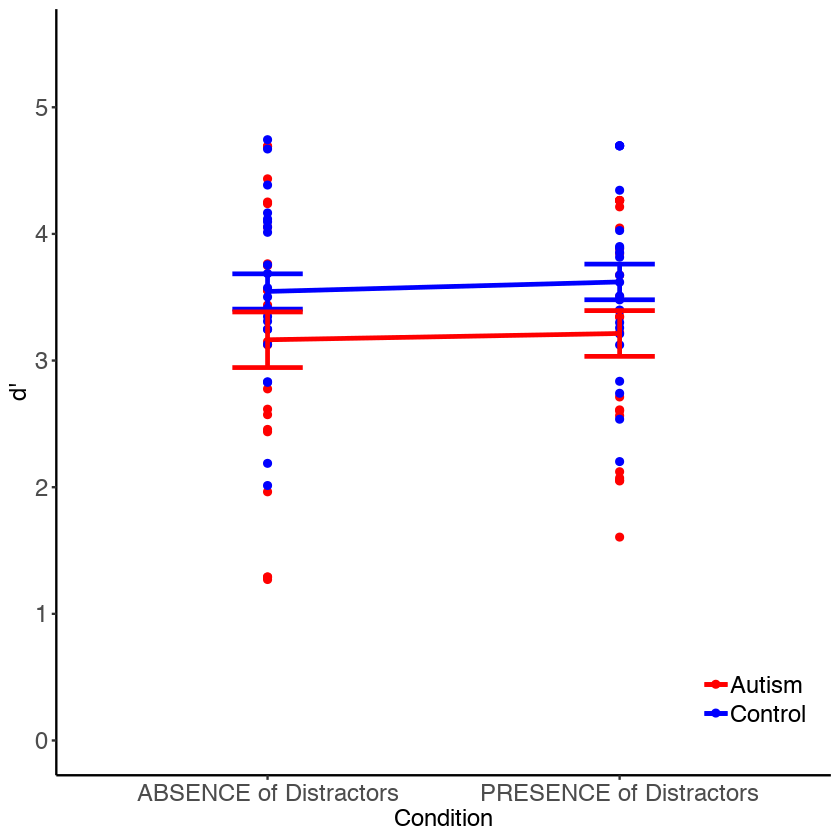

In [10]:
library(tidyverse)

ggplot(data = dataBeh) +
geom_point(mapping = aes(x = distractors, y = dprime)) +
aes(x = distractors, color = diagnosis, group = diagnosis, y = dprime) + 
stat_summary(fun.y = mean, geom = "line", size = 1) + 
stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1) + 
scale_x_discrete(breaks = c("0","1"), labels = c("ABSENCE of Distractors","PRESENCE of Distractors")) +
scale_color_discrete(breaks = c("1","0"), labels = c("Autism","Control")) +
scale_color_manual(breaks = c("1","0"), labels = c("Autism", "Control"), values=c("blue", "red")) +
scale_y_continuous(breaks = 0:5,limits = c(0,5.5)) +
ylab("d'") +
xlab("Condition") +
theme_classic() +
theme(legend.position=c(0.9,0.1)) +
theme(legend.title=element_blank()) +
theme(axis.text=element_text(size=14)) +
theme(axis.title=element_text(size=14)) +
theme(legend.text=element_text(size=14))

In [11]:
nocon.fit = lmer(criterion ~ diagnosis*distractors + (1 | subjectNumber), data = dataBeh)
summary(nocon.fit)
con.fit = lmer(criterion ~ diagnosis*distractors*meds + (1 | subjectNumber), data = dataBeh)
summary(con.fit)
BIC(nocon.fit)
BIC(con.fit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: criterion ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataBeh

REML criterion at convergence: 66.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6793 -0.3720 -0.0615  0.3027  3.3128 

Random effects:
 Groups        Name        Variance Std.Dev.
 subjectNumber (Intercept) 0.07927  0.2815  
 Residual                  0.05336  0.2310  
Number of obs: 94, groups:  subjectNumber, 47

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)              0.80481    0.07434 66.31271  10.826 2.66e-16 ***
diagnosis1               0.10820    0.10627 66.31271   1.018   0.3123    
distractors1             0.12410    0.06668 45.00000   1.861   0.0693 .  
diagnosis1:distractors1 -0.04712    0.09533 45.00000  -0.494   0.6235    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: criterion ~ diagnosis * distractors * meds + (1 | subjectNumber)
   Data: dataBeh

REML criterion at convergence: 68.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.42702 -0.46937 -0.03983  0.34424  3.08108 

Random effects:
 Groups        Name        Variance Std.Dev.
 subjectNumber (Intercept) 0.08355  0.2891  
 Residual                  0.05319  0.2306  
Number of obs: 94, groups:  subjectNumber, 47

Fixed effects:
                              Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                    0.80630    0.07711 62.62051  10.457 2.29e-15 ***
diagnosis1                     0.12271    0.14007 62.62051   0.876   0.3843    
distractors1                   0.12511    0.06801 43.00000   1.840   0.0727 .  
meds1                         -0.03572    0.37773 62.62051  -0.095   0.9250    
diagnosis1:distractors1       -0.16162    0.12354 43.00000  

[1] 93.59284

[1] 114.2865

In [12]:
no.fit = lmer(criterion ~ (1 | subjectNumber), data = dataBeh)
exp((BIC(nocon.fit)-BIC(no.fit))/2)

[1] 8760.189

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


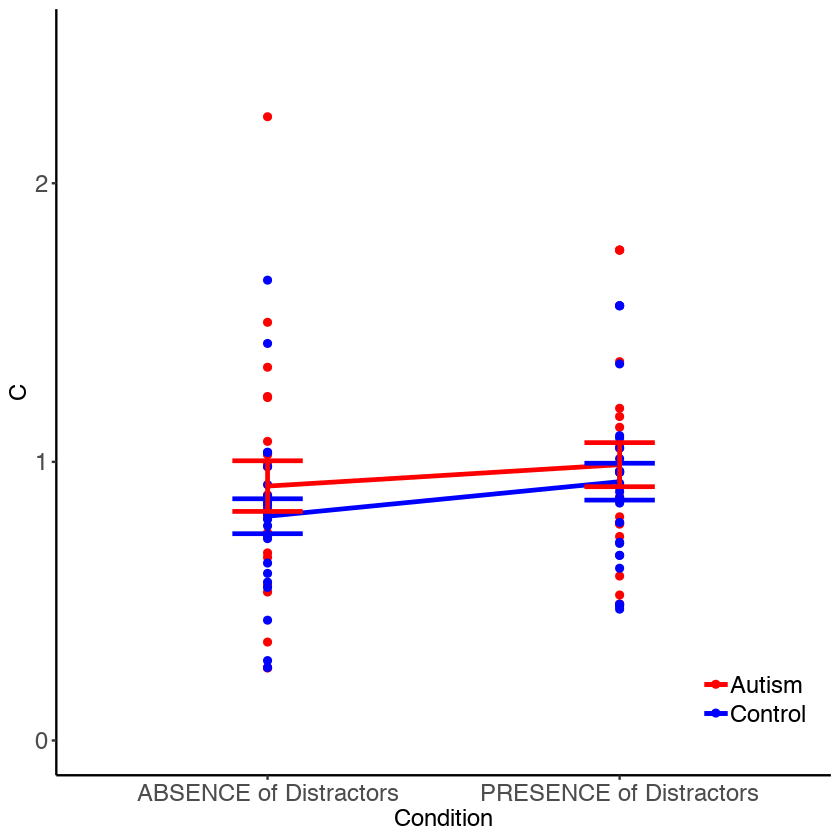

In [13]:
ggplot(data = dataBeh) +
geom_point(mapping = aes(x = distractors, y = criterion)) +
aes(x = distractors, color = diagnosis, group = diagnosis, y = criterion) + 
stat_summary(fun.y = mean, geom = "line", size = 1) + 
stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1) + 
scale_x_discrete(breaks = c("0","1"), labels = c("ABSENCE of Distractors","PRESENCE of Distractors")) +
scale_color_discrete(breaks = c("1","0"), labels = c("Autism","Control")) +
scale_color_manual(breaks = c("1","0"), labels = c("Autism", "Control"), values=c("blue", "red")) +
scale_y_continuous(breaks = 0:2,limits = c(0,2.5)) +
ylab("C") +
xlab("Condition") +
theme_classic() +
theme(legend.position=c(0.9,0.1)) +
theme(legend.title=element_blank()) +
theme(axis.text=element_text(size=14)) +
theme(axis.title=element_text(size=14)) +
theme(legend.text=element_text(size=14))

In [14]:
nocon.fit = lmer(RT ~ diagnosis*distractors + (1 | subjectNumber), data = dataBeh)
summary(nocon.fit)
con.fit = lmer(RT ~ diagnosis*distractors*meds + (1 | subjectNumber), data = dataBeh)
summary(con.fit)
BIC(nocon.fit)
BIC(con.fit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: RT ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataBeh

REML criterion at convergence: -293.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.78201 -0.43617 -0.02152  0.41157  2.33154 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 0.0036964 0.06080 
 Residual                  0.0004799 0.02191 
Number of obs: 94, groups:  subjectNumber, 47

Fixed effects:
                         Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)              0.648617   0.013191 50.466266  49.170   <2e-16 ***
diagnosis1              -0.022831   0.018857 50.466266  -1.211    0.232    
distractors1            -0.001205   0.006324 45.000002  -0.191    0.850    
diagnosis1:distractors1  0.006621   0.009040 45.000002   0.732    0.468    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: RT ~ diagnosis * distractors * meds + (1 | subjectNumber)
   Data: dataBeh

REML criterion at convergence: -274.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7518 -0.4231 -0.0058  0.3957  2.2900 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 0.0037659 0.06137 
 Residual                  0.0004989 0.02234 
Number of obs: 94, groups:  subjectNumber, 47

Fixed effects:
                               Estimate Std. Error        df t value Pr(>|t|)
(Intercept)                    0.651788   0.013617 48.322284  47.865   <2e-16
diagnosis1                    -0.028711   0.024737 48.322284  -1.161    0.251
distractors1                  -0.001926   0.006587 43.000002  -0.292    0.771
meds1                         -0.076088   0.066710 48.322284  -1.141    0.260
diagnosis1:distractors1        0.007552   0.011965 43.000002   0.631    0.531
diag

[1] -266.5835

[1] -228.8893

In [15]:
no.fit = lmer(RT ~ (1 | subjectNumber), data = dataBeh)
exp((BIC(nocon.fit)-BIC(no.fit))/2)

[1] 30545766

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


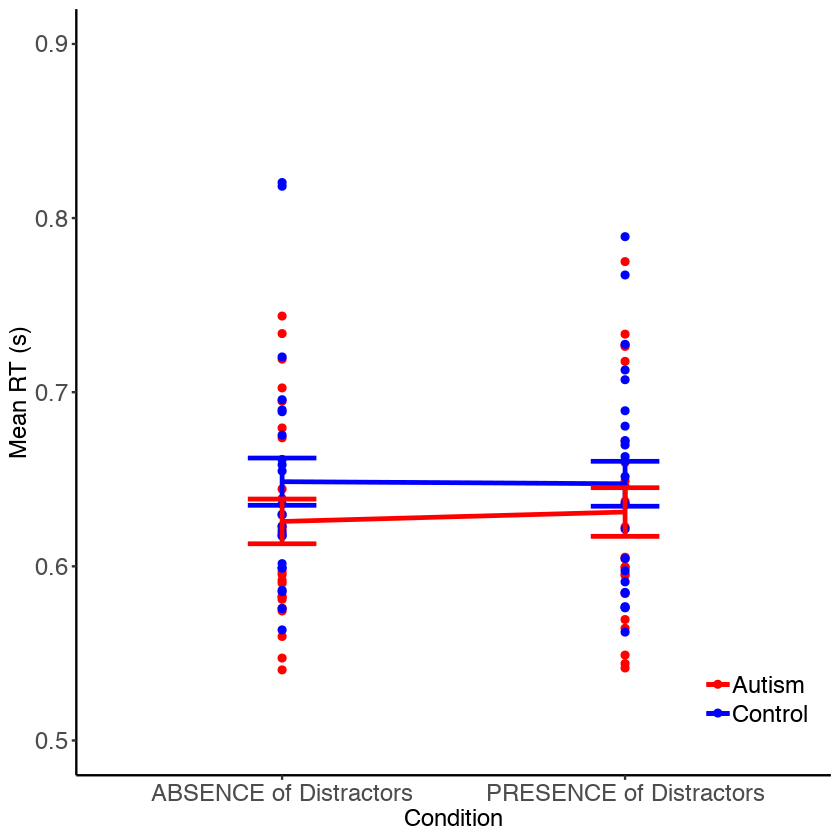

In [16]:
ggplot(data = dataBeh) +
geom_point(mapping = aes(x = distractors, y = RT)) +
aes(x = distractors, color = diagnosis, group = diagnosis, y = RT) + 
stat_summary(fun.y = mean, geom = "line", size = 1) + 
stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1) + 
scale_x_discrete(breaks = c("0","1"), labels = c("ABSENCE of Distractors","PRESENCE of Distractors")) +
scale_color_discrete(breaks = c("1","0"), labels = c("Autism","Control")) +
scale_color_manual(breaks = c("1","0"), labels = c("Autism", "Control"), values=c("blue", "red")) +
scale_y_continuous(limits = c(0.5,0.9)) +
ylab("Mean RT (s)") +
xlab("Condition") +
theme_classic() +
theme(legend.position=c(0.9,0.1)) +
theme(legend.title=element_blank()) +
theme(axis.text=element_text(size=14)) +
theme(axis.title=element_text(size=14)) +
theme(legend.text=element_text(size=14))

In [17]:
dataBase = peakPupil %>%
subset(hit == 1 & FA == 0 & miss == 0 & aud == 0 & distractors == 0)

In [18]:
nocon.fit = lm(baseline ~ diagnosis, data = dataBase)
summary(nocon.fit)
con.fit = lm(baseline ~ diagnosis*meds, data = dataBase)
summary(con.fit)
BIC(nocon.fit)
BIC(con.fit)


Call:
lm(formula = baseline ~ diagnosis, data = dataBase)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.756  -9.246  -1.175   6.321  43.346 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  77.1579     2.9932  25.778   <2e-16 ***
diagnosis1    0.3844     4.3281   0.089     0.93    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.66 on 44 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.0001792,	Adjusted R-squared:  -0.02254 
F-statistic: 0.007886 on 1 and 44 DF,  p-value: 0.9296



Call:
lm(formula = baseline ~ diagnosis * meds, data = dataBase)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.652  -8.279  -1.071   7.779  43.450 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        77.054      3.110  24.775   <2e-16 ***
diagnosis1         -1.973      5.650  -0.349    0.729    
meds1               2.495     15.236   0.164    0.871    
diagnosis1:meds1    2.018     16.521   0.122    0.903    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.92 on 42 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01255,	Adjusted R-squared:  -0.05798 
F-statistic: 0.1779 on 3 and 42 DF,  p-value: 0.9108


[1] 387.0371

[1] 394.1217

In [19]:
no.fit = lm(baseline ~ 1, data = dataBase)
exp((BIC(nocon.fit)-BIC(no.fit))/2)

[1] 6.754431

Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

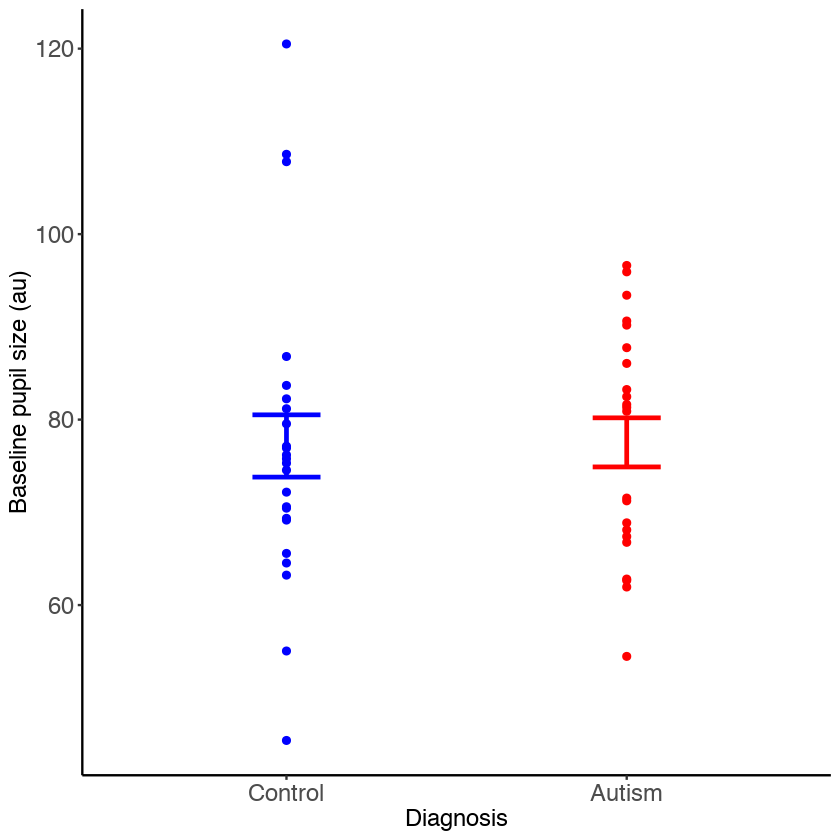

In [20]:
ggplot(data = dataBase) +
geom_point(mapping = aes(x = diagnosis, y = baseline)) +
aes(x = diagnosis, color = diagnosis, y = baseline) + 
stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1) + 
scale_x_discrete(breaks = c("1","0"), labels = c("Autism","Control")) +
scale_color_manual(breaks = c("1","0"), labels = c("Autism", "Control"), values=c("blue", "red")) +
#scale_y_continuous(limits = c(0.5,0.9)) +
ylab("Baseline pupil size (au)") +
xlab("Diagnosis") +
theme_classic() +
theme(legend.position="none") +
theme(axis.text=element_text(size=14)) +
theme(axis.title=element_text(size=14))

In [21]:
dataHit = peakPupil %>%
subset(hit == 1 & FA == 0 & miss == 0 & aud == 0)

In [22]:
nocon.fit = lmer(peak ~ diagnosis*distractors + (1 | subjectNumber), data = dataHit)
summary(nocon.fit)
con.fit = lmer(peak ~ diagnosis*distractors*meds + (1 | subjectNumber), data = dataHit)
summary(con.fit)
BIC(nocon.fit)
BIC(con.fit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataHit

REML criterion at convergence: -849.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5478 -0.5105 -0.1997  0.3793  3.3475 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 2.472e-06 0.001572
 Residual                  1.932e-06 0.001390
Number of obs: 93, groups:  subjectNumber, 47

Fixed effects:
                          Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              4.878e-03  4.284e-04  6.736e+01  11.386  < 2e-16 ***
diagnosis1               4.645e-05  6.124e-04  6.736e+01   0.076  0.93976    
distractors1             1.177e-03  4.013e-04  4.328e+01   2.933  0.00534 ** 
diagnosis1:distractors1 -1.772e-03  5.788e-04  4.363e+01  -3.062  0.00376 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixe

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ diagnosis * distractors * meds + (1 | subjectNumber)
   Data: dataHit

REML criterion at convergence: -810.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4612 -0.5013 -0.1160  0.4139  3.0265 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 2.357e-06 0.001535
 Residual                  1.875e-06 0.001369
Number of obs: 93, groups:  subjectNumber, 47

Fixed effects:
                                Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                    0.0048237  0.0004290 64.0495201  11.245  < 2e-16
diagnosis1                     0.0011155  0.0007792 64.0495201   1.432  0.15713
distractors1                   0.0010897  0.0004038 40.5948875   2.699  0.01009
meds1                          0.0012936  0.0021015 64.0495201   0.616  0.54034
diagnosis1:distractors1       -0.0023450  0.0007335 40.5948875  -3.197

[1] -821.9255

[1] -764.8157

In [23]:
library(multcomp)

me.fit = lmer(peak ~ diagnosis*distractors + (1  | subjectNumber), data = dataHit)
summary(me.fit)

MAutAut = matrix(c(0,0,1,1),1) #comparison of autism participants across the two conditions (null)
MConCon = matrix(c(0,0,1,0),1) #comparison of controls across the two conditions (null)
MAutConNoDis = matrix(c(0,1,0,0),1) #comparison of autism and control participants in the no distractor condition (null)
MAutConDis = matrix(c(0,1,0,1),1) #comparison of autism and control participants in the distractor condition (null)

AutAut = glht(me.fit,linfct = MAutAut)
summary(AutAut)

ConCon = glht(me.fit,linfct = MConCon)
summary(ConCon)

AutConNoDis = glht(me.fit,linfct = MAutConNoDis)
summary(AutConNoDis)

AutConDis = glht(me.fit,linfct = MAutConDis)
summary(AutConDis)

Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select


Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataHit

REML criterion at convergence: -849.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5478 -0.5105 -0.1997  0.3793  3.3475 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 2.472e-06 0.001572
 Residual                  1.932e-06 0.001390
Number of obs: 93, groups:  subjectNumber, 47

Fixed effects:
                          Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              4.878e-03  4.284e-04  6.736e+01  11.386  < 2e-16 ***
diagnosis1               4.645e-05  6.124e-04  6.736e+01   0.076  0.93976    
distractors1             1.177e-03  4.013e-04  4.328e+01   2.933  0.00534 ** 
diagnosis1:distractors1 -1.772e-03  5.788e-04  4.363e+01  -3.062  0.00376 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixe


	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataHit)

Linear Hypotheses:
         Estimate Std. Error z value Pr(>|z|)
1 == 0 -0.0005952  0.0004171  -1.427    0.154
(Adjusted p values reported -- single-step method)



	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataHit)

Linear Hypotheses:
        Estimate Std. Error z value Pr(>|z|)   
1 == 0 0.0011772  0.0004013   2.933  0.00335 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataHit)

Linear Hypotheses:
        Estimate Std. Error z value Pr(>|z|)
1 == 0 4.645e-05  6.124e-04   0.076     0.94
(Adjusted p values reported -- single-step method)



	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataHit)

Linear Hypotheses:
         Estimate Std. Error z value Pr(>|z|)   
1 == 0 -0.0017260  0.0006172  -2.796  0.00517 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.
Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

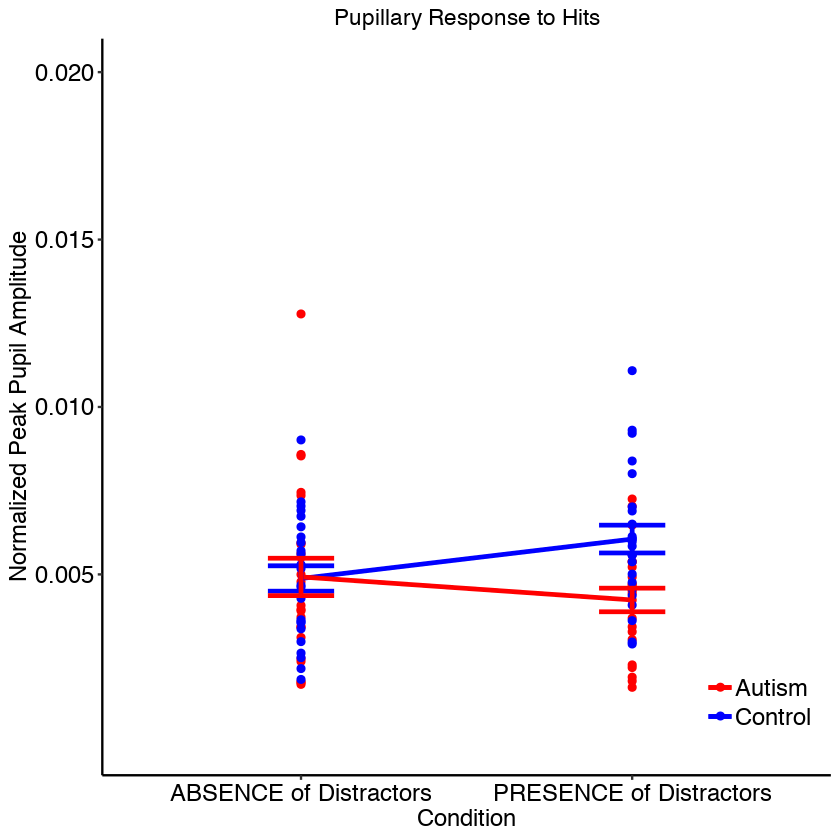

In [24]:
ggplot(data = dataHit) +
geom_point(mapping = aes(x = distractors, y = peak)) +
aes(x = distractors, color = diagnosis, group = diagnosis, y = peak) + 
stat_summary(fun.y = mean, geom = "line", size = 1) + 
stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1) + 
scale_x_discrete(breaks = c("0","1"), labels = c("ABSENCE of Distractors","PRESENCE of Distractors")) +
scale_color_discrete(breaks = c("1","0"), labels = c("Autism","Control")) +
scale_color_manual(breaks = c("1","0"), labels = c("Autism", "Control"), values=c("blue", "red")) +
scale_y_continuous(breaks = (c(0.005,0.01,0.015,0.02)),limits=c(0, 0.02)) +
ylab("Normalized Peak Pupil Amplitude") +
xlab("Condition") +
theme_classic() +
theme(legend.position=c(0.9,0.1)) +
theme(legend.title=element_blank()) +
theme(axis.text=element_text(size=14, color = "black")) +
theme(axis.title=element_text(size=14, color = "black")) +
theme(legend.text=element_text(size=14)) +
 theme( axis.line = element_line(colour = "black", 
                      linetype = "solid"))+
ggtitle("Pupillary Response to Hits") +
  theme(plot.title = element_text(hjust = 0.5))

In [25]:
dataFA = peakPupil %>%
subset(hit == 0 & FA == 1 & miss == 0 & aud == 0)

In [26]:
nocon.fit = lmer(peak ~ diagnosis*distractors + (1 | subjectNumber), data = dataFA)
summary(nocon.fit)
con.fit = lmer(peak ~ diagnosis*distractors*meds + (1 | subjectNumber), data = dataFA)
summary(con.fit)
BIC(nocon.fit)
BIC(con.fit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataFA

REML criterion at convergence: -735.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.63983 -0.59613 -0.02414  0.55049  2.02502 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 4.641e-06 0.002154
 Residual                  5.319e-06 0.002306
Number of obs: 89, groups:  subjectNumber, 46

Fixed effects:
                          Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              0.0082893  0.0006442 70.4591508  12.868   <2e-16 ***
diagnosis1               0.0001570  0.0009315 70.4591508   0.169   0.8666    
distractors1             0.0007743  0.0006876 42.7786858   1.126   0.2664    
diagnosis1:distractors1 -0.0026181  0.0009865 42.4388166  -2.654   0.0112 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlatio

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ diagnosis * distractors * meds + (1 | subjectNumber)
   Data: dataFA

REML criterion at convergence: -699.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.65918 -0.62857 -0.04244  0.57190  2.24083 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 4.406e-06 0.002099
 Residual                  5.202e-06 0.002281
Number of obs: 89, groups:  subjectNumber, 46

Fixed effects:
                                Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                    0.0080086  0.0006463 67.6571860  12.391   <2e-16
diagnosis1                    -0.0003284  0.0011741 67.6571860  -0.280    0.781
distractors1                   0.0009203  0.0006955 41.0168061   1.323    0.193
meds1                          0.0067367  0.0031664 67.6571860   2.128    0.037
diagnosis1:distractors1       -0.0016908  0.0012346 40.038700

[1] -708.4209

[1] -654.5694

In [27]:
me.fit = lmer(peak ~ diagnosis*distractors + (1  | subjectNumber), data = dataFA)
summary(me.fit)

MAutAut = matrix(c(0,0,1,1),1) #comparison of autism participants across the two conditions (null)
MConCon = matrix(c(0,0,1,0),1) #comparison of controls across the two conditions (null)
MAutConNoDis = matrix(c(0,1,0,0),1) #comparison of autism and control participants in the no distractor condition (null)
MAutConDis = matrix(c(0,1,0,1),1) #comparison of autism and control participants in the distractor condition (null)

AutAut = glht(me.fit,linfct = MAutAut)
summary(AutAut)

ConCon = glht(me.fit,linfct = MConCon)
summary(ConCon)

AutConNoDis = glht(me.fit,linfct = MAutConNoDis)
summary(AutConNoDis)

AutConDis = glht(me.fit,linfct = MAutConDis)
summary(AutConDis)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataFA

REML criterion at convergence: -735.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.63983 -0.59613 -0.02414  0.55049  2.02502 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 4.641e-06 0.002154
 Residual                  5.319e-06 0.002306
Number of obs: 89, groups:  subjectNumber, 46

Fixed effects:
                          Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              0.0082893  0.0006442 70.4591508  12.868   <2e-16 ***
diagnosis1               0.0001570  0.0009315 70.4591508   0.169   0.8666    
distractors1             0.0007743  0.0006876 42.7786858   1.126   0.2664    
diagnosis1:distractors1 -0.0026181  0.0009865 42.4388166  -2.654   0.0112 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlatio


	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataFA)

Linear Hypotheses:
         Estimate Std. Error z value Pr(>|z|)   
1 == 0 -0.0018438  0.0007074  -2.606  0.00915 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataFA)

Linear Hypotheses:
        Estimate Std. Error z value Pr(>|z|)
1 == 0 0.0007743  0.0006876   1.126     0.26
(Adjusted p values reported -- single-step method)



	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataFA)

Linear Hypotheses:
        Estimate Std. Error z value Pr(>|z|)
1 == 0 0.0001570  0.0009315   0.169    0.866
(Adjusted p values reported -- single-step method)



	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataFA)

Linear Hypotheses:
         Estimate Std. Error z value Pr(>|z|)  
1 == 0 -0.0024611  0.0009561  -2.574   0.0101 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.
Warning message:
“Removed 5 rows containing non-finite values (stat_summary).”Warning message:
“Removed 5 rows containing non-finite values (stat_summary).”Warning message:
“Removed 5 rows containing missing values (geom_point).”

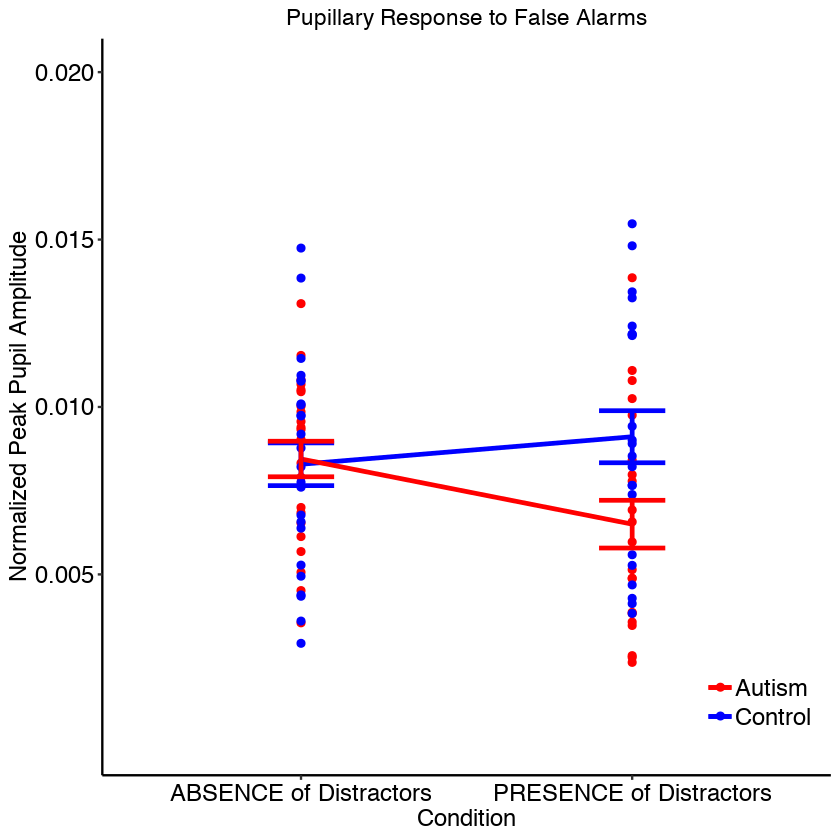

In [28]:
ggplot(data = dataFA) +
geom_point(mapping = aes(x = distractors, y = peak)) +
aes(x = distractors, color = diagnosis, group = diagnosis, y = peak) + 
stat_summary(fun.y = mean, geom = "line", size = 1) + 
stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1) + 
scale_x_discrete(breaks = c("0","1"), labels = c("ABSENCE of Distractors","PRESENCE of Distractors")) +
scale_color_discrete(breaks = c("1","0"), labels = c("Autism","Control")) +
scale_color_manual(breaks = c("1","0"), labels = c("Autism", "Control"), values=c("blue", "red")) +
scale_y_continuous(breaks = (c(0.005,0.01,0.015,0.02)),limits=c(0, 0.02)) +
ylab("Normalized Peak Pupil Amplitude") +
xlab("Condition") +
theme_classic() +
theme(legend.position=c(0.9,0.1)) +
theme(legend.title=element_blank()) +
theme(axis.text=element_text(size=14, color = "black")) +
theme(axis.title=element_text(size=14, color = "black")) +
theme(legend.text=element_text(size=14)) +
 theme( axis.line = element_line(colour = "black", 
                      linetype = "solid"))+
ggtitle("Pupillary Response to False Alarms")+
  theme(plot.title = element_text(hjust = 0.5))

In [29]:
dataMiss = peakPupil %>%
subset(hit == 0 & FA == 0 & miss == 1 & aud == 0)

In [30]:
nocon.fit = lmer(peak ~ diagnosis*distractors + (1 | subjectNumber), data = dataMiss)
summary(nocon.fit)
con.fit = lmer(peak ~ diagnosis*distractors*meds + (1 | subjectNumber), data = dataMiss)
summary(con.fit)
BIC(nocon.fit)
BIC(con.fit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataMiss

REML criterion at convergence: -786

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4591 -0.4996 -0.1145  0.3731  3.1913 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 3.813e-06 0.001953
 Residual                  3.900e-06 0.001975
Number of obs: 92, groups:  subjectNumber, 46

Fixed effects:
                          Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              0.0064343  0.0005669 70.7186482  11.350   <2e-16 ***
diagnosis1              -0.0018669  0.0008197 70.7186482  -2.277   0.0258 *  
distractors1            -0.0016646  0.0005701 44.0000004  -2.920   0.0055 ** 
diagnosis1:distractors1  0.0011599  0.0008244 44.0000004   1.407   0.1664    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ diagnosis * distractors * meds + (1 | subjectNumber)
   Data: dataMiss

REML criterion at convergence: -751.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4811 -0.4340 -0.0844  0.2504  3.1973 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 4.284e-06 0.002070
 Residual                  3.359e-06 0.001833
Number of obs: 92, groups:  subjectNumber, 46

Fixed effects:
                                Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                    0.0065274  0.0005765 63.9200969  11.323  < 2e-16
diagnosis1                    -0.0021253  0.0010472 63.9200969  -2.029 0.046586
distractors1                  -0.0019480  0.0005405 42.0000001  -3.604 0.000823
meds1                         -0.0022346  0.0028242 63.9200969  -0.791 0.431732
diagnosis1:distractors1        0.0023966  0.0009819 42.0000001   2.44

[1] -758.9169

[1] -706.0498

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.
Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

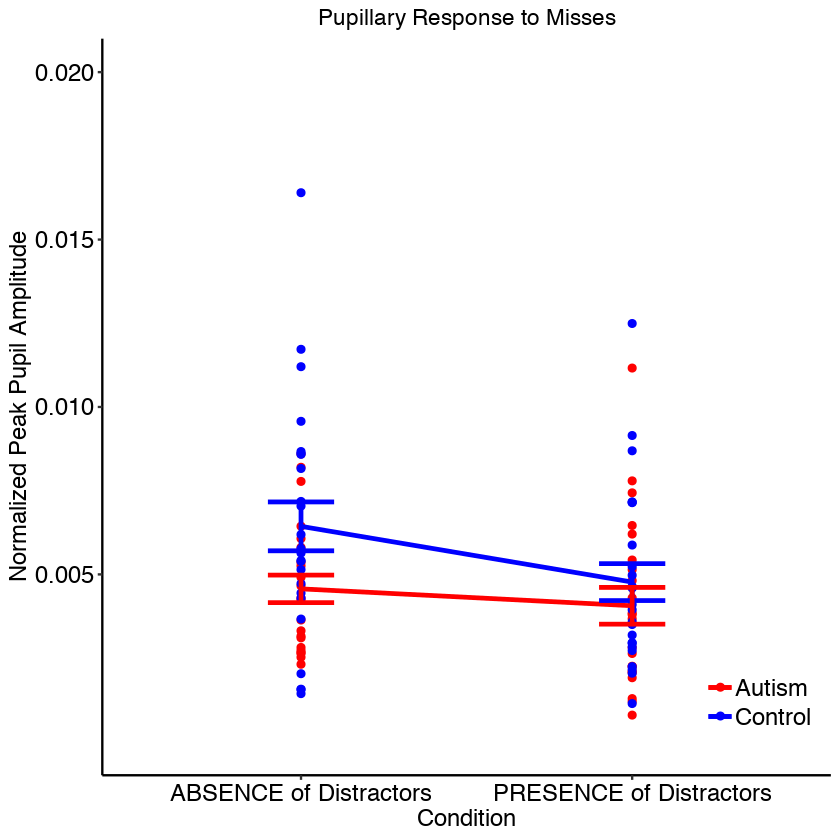

In [31]:
ggplot(data = dataMiss) +
geom_point(mapping = aes(x = distractors, y = peak)) +
aes(x = distractors, color = diagnosis, group = diagnosis, y = peak) + 
stat_summary(fun.y = mean, geom = "line", size = 1) + 
stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1) + 
scale_x_discrete(breaks = c("0","1"), labels = c("ABSENCE of Distractors","PRESENCE of Distractors")) +
scale_color_discrete(breaks = c("1","0"), labels = c("Autism","Control")) +
scale_color_manual(breaks = c("1","0"), labels = c("Autism", "Control"), values=c("blue", "red")) +
scale_y_continuous(breaks = (c(0.005,0.01,0.015,0.02)),limits=c(0, 0.02)) +
ylab("Normalized Peak Pupil Amplitude") +
xlab("Condition") +
theme_classic() +
theme(legend.position=c(0.9,0.1)) +
theme(legend.title=element_blank()) +
theme(axis.text=element_text(size=14, color = "black")) +
theme(axis.title=element_text(size=14, color = "black")) +
theme(legend.text=element_text(size=14)) +
 theme( axis.line = element_line(colour = "black", 
                      linetype = "solid"))+
ggtitle("Pupillary Response to Misses")+
  theme(plot.title = element_text(hjust = 0.5))

In [32]:
dataAud = peakPupil %>%
subset(hit == 0 & FA == 0 & miss == 0 & aud == 1 & distractors == 1)

In [33]:
nocon.fit = glm(peak ~ diagnosis, data = dataAud)
summary(nocon.fit)
con.fit = glm(peak ~ diagnosis*meds, data = dataAud)
summary(con.fit)
BIC(nocon.fit)
BIC(con.fit)


Call:
glm(formula = peak ~ diagnosis, data = dataAud)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-0.0015821  -0.0004790  -0.0002070   0.0003512   0.0025280  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0021798  0.0001705  12.781   <2e-16 ***
diagnosis1  -0.0004091  0.0002466  -1.659    0.104    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 6.98061e-07)

    Null deviance: 3.2636e-05  on 45  degrees of freedom
Residual deviance: 3.0715e-05  on 44  degrees of freedom
  (1 observation deleted due to missingness)
AIC: -517.55

Number of Fisher Scoring iterations: 2



Call:
glm(formula = peak ~ diagnosis * meds, data = dataAud)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-0.0015525  -0.0004494  -0.0001819   0.0002473   0.0025266  

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.0021502  0.0001769  12.155 2.43e-15 ***
diagnosis1       -0.0003815  0.0003336  -1.144    0.259    
meds1             0.0007110  0.0008666   0.820    0.417    
diagnosis1:meds1 -0.0007077  0.0009415  -0.752    0.456    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 7.197642e-07)

    Null deviance: 3.2636e-05  on 45  degrees of freedom
Residual deviance: 3.0230e-05  on 42  degrees of freedom
  (1 observation deleted due to missingness)
AIC: -514.28

Number of Fisher Scoring iterations: 2


[1] -512.0646

[1] -505.1389

In [34]:
no.fit = lm(peak ~ 1, data = dataAud)
exp((BIC(nocon.fit)-BIC(no.fit))/2)

[1] 1.679819

Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

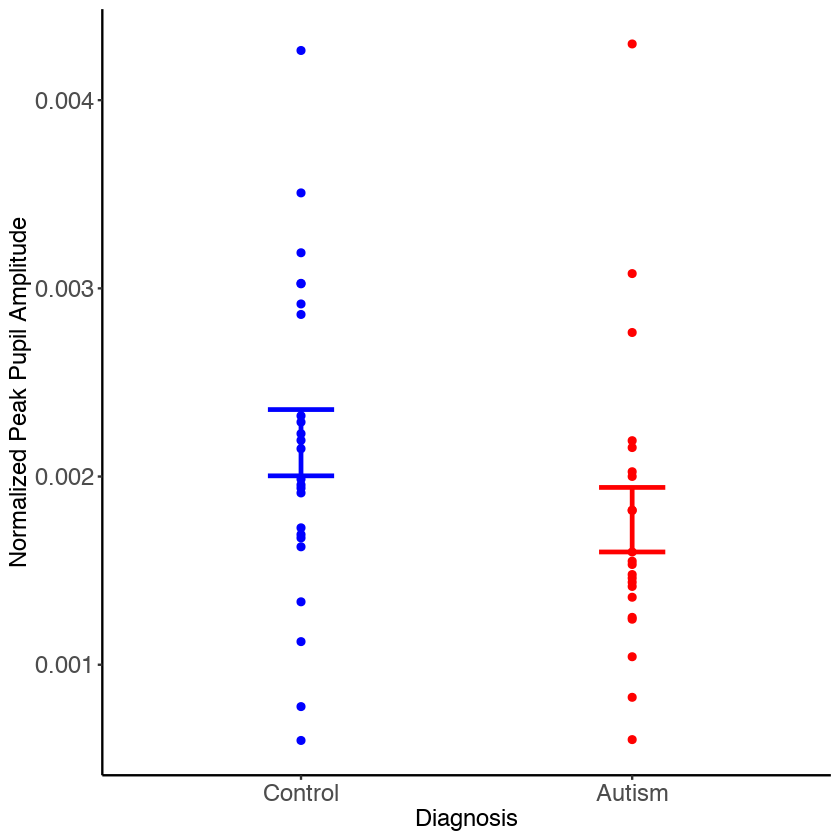

In [35]:
ggplot(data = dataAud) +
geom_point(mapping = aes(x = diagnosis, y = peak)) +
aes(x = diagnosis, color = diagnosis, y = peak) + 
stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1) + 
scale_x_discrete(breaks = c("1","0"), labels = c("Autism","Control")) +
scale_color_manual(breaks = c("1","0"), labels = c("Autism", "Control"), values=c("blue", "red")) +
#scale_y_continuous(limits = c(0.5,0.9)) +
ylab("Normalized Peak Pupil Amplitude") +
xlab("Diagnosis") +
theme_classic() +
theme(legend.position="none") +
theme(axis.text=element_text(size=14)) +
theme(axis.title=element_text(size=14))

In [36]:
dataRatHit = peakPupil %>%
subset(hit == 1 & FA == 0 & miss == 0 & aud == 0 & distractors == 0)

In [37]:
nocon.fit = glm(RatHit ~ diagnosis, data = dataRatHit)
summary(nocon.fit)
con.fit = glm(RatHit ~ diagnosis*meds, data = dataRatHit)
summary(con.fit)
BIC(nocon.fit)
BIC(con.fit)


Call:
glm(formula = RatHit ~ diagnosis, data = dataRatHit)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.70396  -0.27175  -0.02806   0.19696   1.39724  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.33634    0.07886  16.946  < 2e-16 ***
diagnosis1  -0.35325    0.11403  -3.098  0.00339 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.1492523)

    Null deviance: 7.9994  on 45  degrees of freedom
Residual deviance: 6.5671  on 44  degrees of freedom
  (1 observation deleted due to missingness)
AIC: 47

Number of Fisher Scoring iterations: 2



Call:
glm(formula = RatHit ~ diagnosis * meds, data = dataRatHit)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.69591  -0.27204  -0.02398   0.20755   1.40528  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.32830    0.08189  16.221   <2e-16 ***
diagnosis1       -0.39929    0.14876  -2.684   0.0104 *  
meds1             0.19304    0.40117   0.481   0.6329    
diagnosis1:meds1 -0.09388    0.43499  -0.216   0.8302    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.1542325)

    Null deviance: 7.9994  on 45  degrees of freedom
Residual deviance: 6.4778  on 42  degrees of freedom
  (1 observation deleted due to missingness)
AIC: 50.37

Number of Fisher Scoring iterations: 2


[1] 52.48611

[1] 59.51331

In [38]:
dataRatFA = peakPupil %>%
subset(hit == 1 & FA == 0 & miss == 0 & aud == 0 & distractors == 0)

In [39]:
nocon.fit = glm(RatFA ~ diagnosis, data = dataRatFA)
summary(nocon.fit)
con.fit = glm(RatFA ~ diagnosis*meds, data = dataRatFA)
summary(con.fit)
BIC(nocon.fit)
BIC(con.fit)


Call:
glm(formula = RatFA ~ diagnosis, data = dataRatFA)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.73565  -0.32022  -0.03858   0.29763   0.73873  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.16983    0.08581  13.633  < 2e-16 ***
diagnosis1  -0.35034    0.12279  -2.853  0.00675 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.161989)

    Null deviance: 7.9603  on 42  degrees of freedom
Residual deviance: 6.6415  on 41  degrees of freedom
  (4 observations deleted due to missingness)
AIC: 47.711

Number of Fisher Scoring iterations: 2



Call:
glm(formula = RatFA ~ diagnosis * meds, data = dataRatFA)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7521  -0.2823   0.0000   0.2979   0.7626  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.18624    0.08773  13.521 2.64e-16 ***
diagnosis1       -0.26104    0.15447  -1.690    0.099 .  
meds1            -0.36114    0.41150  -0.878    0.386    
diagnosis1:meds1  0.15931    0.44742   0.356    0.724    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.1616325)

    Null deviance: 7.9603  on 42  degrees of freedom
Residual deviance: 6.3037  on 39  degrees of freedom
  (4 observations deleted due to missingness)
AIC: 49.466

Number of Fisher Scoring iterations: 2


[1] 52.99455

[1] 58.27178

In [42]:
dataRatMiss = peakPupil %>%
subset(hit == 1 & FA == 0 & miss == 0 & aud == 0 & distractors == 0)

In [46]:
nocon.fit = glm(RatMiss ~ diagnosis, data = dataRatMiss)
summary(nocon.fit)
con.fit = glm(RatMiss ~ diagnosis*meds, data = dataRatMiss)
summary(con.fit)
BIC(nocon.fit)
BIC(con.fit)


Call:
glm(formula = RatMiss ~ diagnosis, data = dataRatMiss)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6873  -0.3474  -0.1305   0.3019   1.2894  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.85634    0.09384   9.126 1.04e-11 ***
diagnosis1   0.05577    0.13569   0.411    0.683    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.2113363)

    Null deviance: 9.3345  on 45  degrees of freedom
Residual deviance: 9.2988  on 44  degrees of freedom
  (1 observation deleted due to missingness)
AIC: 63

Number of Fisher Scoring iterations: 2



Call:
glm(formula = RatMiss ~ diagnosis * meds, data = dataRatMiss)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5235  -0.2675  -0.1102   0.2105   1.0554  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.80091    0.08265   9.690 2.85e-12 ***
diagnosis1        0.34519    0.15015   2.299 0.026545 *  
meds1             1.33015    0.40492   3.285 0.002063 ** 
diagnosis1:meds1 -1.75916    0.43905  -4.007 0.000246 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.157127)

    Null deviance: 9.3345  on 45  degrees of freedom
Residual deviance: 6.5993  on 42  degrees of freedom
  (1 observation deleted due to missingness)
AIC: 51.225

Number of Fisher Scoring iterations: 2


[1] 68.48547

[1] 60.36861

In [45]:
me.fit = glm(RatMiss ~ diagnosis*meds, data = dataRatMiss)
summary(me.fit)

MAutAut = matrix(c(0,0,1,1),1) #comparison of autism participants across the two conditions (null)
MConCon = matrix(c(0,0,1,0),1) #comparison of controls across the two conditions (null)
MAutConNoMed = matrix(c(0,1,0,0),1) #comparison of autism and control participants in the no distractor condition (null)
MAutConMed = matrix(c(0,1,0,1),1) #comparison of autism and control participants in the distractor condition (null)

AutAut = glht(me.fit,linfct = MAutAut)
summary(AutAut)

ConCon = glht(me.fit,linfct = MConCon)
summary(ConCon)

AutConNoMed = glht(me.fit,linfct = MAutConNoMed)
summary(AutConNoMed)

AutConMed = glht(me.fit,linfct = MAutConMed)
summary(AutConMed)


Call:
glm(formula = RatMiss ~ diagnosis * meds, data = dataRatMiss)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5235  -0.2675  -0.1102   0.2105   1.0554  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.80091    0.08265   9.690 2.85e-12 ***
diagnosis1        0.34519    0.15015   2.299 0.026545 *  
meds1             1.33015    0.40492   3.285 0.002063 ** 
diagnosis1:meds1 -1.75916    0.43905  -4.007 0.000246 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.157127)

    Null deviance: 9.3345  on 45  degrees of freedom
Residual deviance: 6.5993  on 42  degrees of freedom
  (1 observation deleted due to missingness)
AIC: 51.225

Number of Fisher Scoring iterations: 2



	 Simultaneous Tests for General Linear Hypotheses

Fit: glm(formula = RatMiss ~ diagnosis * meds, data = dataRatMiss)

Linear Hypotheses:
       Estimate Std. Error z value Pr(>|z|)  
1 == 0  -0.4290     0.1697  -2.528   0.0115 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Tests for General Linear Hypotheses

Fit: glm(formula = RatMiss ~ diagnosis * meds, data = dataRatMiss)

Linear Hypotheses:
       Estimate Std. Error z value Pr(>|z|)   
1 == 0   1.3302     0.4049   3.285  0.00102 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Tests for General Linear Hypotheses

Fit: glm(formula = RatMiss ~ diagnosis * meds, data = dataRatMiss)

Linear Hypotheses:
       Estimate Std. Error z value Pr(>|z|)  
1 == 0   0.3452     0.1501   2.299   0.0215 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Tests for General Linear Hypotheses

Fit: glm(formula = RatMiss ~ diagnosis * meds, data = dataRatMiss)

Linear Hypotheses:
       Estimate Std. Error z value Pr(>|z|)    
1 == 0  -1.4140     0.4126  -3.427  0.00061 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [47]:
no.fit = lm(RatMiss ~ 1, data = dataRatMiss)
exp((BIC(nocon.fit)-BIC(no.fit))/2)

[1] 6.210158